# 1.2 Non-linear Regression

In [1]:
%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
rcParams['figure.figsize'] = (8, 8)
font = {'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
from IPython.core.display import HTML
css_file = '../my.css'
HTML(open(css_file, "r").read())

For linear regression the model we try to fit to the data is

$$f(x,\theta)=\theta_0x_0 + \theta_1x_1 + \theta_2x_2+...+\theta_mx_m = \theta^{\prime} x$$

where $m$ is the number of variables in the data set. For $m=1$ this becomes

$$f(x,\theta)=\theta_0x_0 + \theta_1x_1.$$

This model represents a linear relationship between the dependent and the independent variable, i.e. we assumed the true relationship was linear. Suppose we know the relation is not linear. What other assumptions can we make?

It turns out that many non-linear relationships can be modelled as an $n^{th}$-degree polynomial function, which is basically a curved line. The amount of flexibility of the curve is determined by its degree.

A polynomial model of degree 2 is formulized as follows:

$$f(x,\theta)=\theta_0x_0 + \theta_1x_1 + \theta_2x_1^2.$$

So we added a term for the square of $x_1$ and control it by model parameter $\theta_2$.

Now we load a data set that can be modeled perfectly by a polynomial:

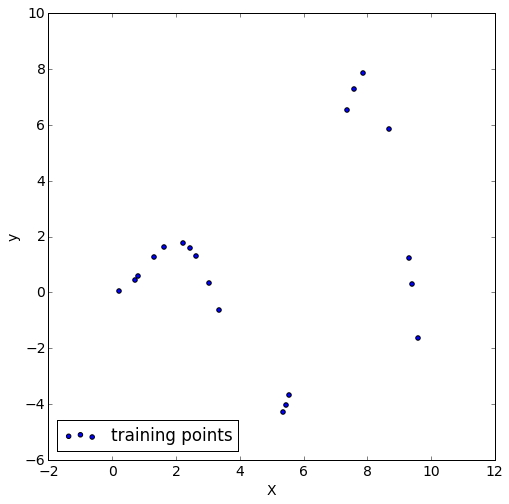

In [4]:
data = pd.read_csv("nonlinear.csv",sep=" ")
X = data['X'].values[:,np.newaxis]
y = data['y'].values

plt.scatter(X, y, label="training points")
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='lower left')
plt.show()

Clearly a linear fit would never model the data correctly.

Now, instead of creating a new learning algorithm that uses the polynomial model, we can also transform the data by adding polynomial features. In fact, the polynomial model 

$$f(x,\theta)=\theta_0x_0 + \theta_1x_1 + \theta_2x_1^2.$$

is really just a linear model with features $(x_0,x_1,x_1^2)$. We can thus keep using the linear regression algorithm by augmenting the data set with polynomial transformations of the original variables.

To add the polynomial variables to our data set we use the scikit-learn object *PolynomialFeatures*:

(20L, 3L)


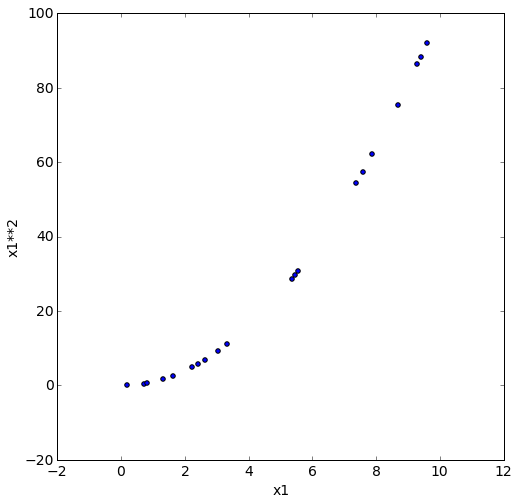

In [5]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
Xpoly = poly.fit_transform(X)

print Xpoly.shape

plt.scatter(Xpoly[:,1],Xpoly[:,2])
plt.xlabel('x1')
plt.ylabel('x1**2')
plt.show()

The plot shows how the added polynomial feature $x_1^2$ relates non-linearly to $x_1$.

We can now try to fit a linear model to this augmented data set using the scikit-learn *LinearRegession* object that computes the optimal linear fit directly:

[ 0.86739691 -0.34515908  0.06009686]


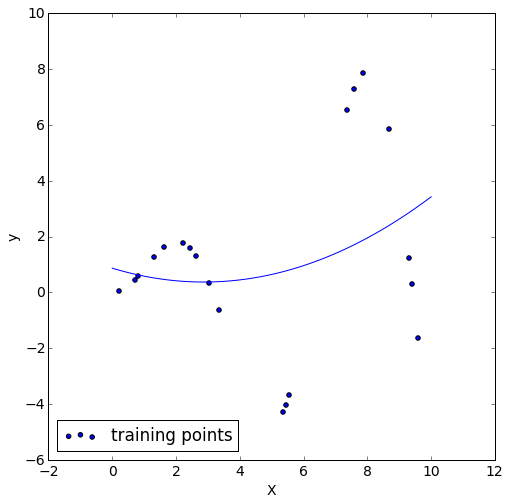

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)

model.fit(Xpoly, y)
print model.coef_

x_plot = np.linspace(0, 10, 100)
plt.plot(x_plot,model.coef_[0] + model.coef_[1]*x_plot + model.coef_[2]*((x_plot)**2))

plt.scatter(X, y, label="training points")
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='lower left')
plt.show()

This still doesn't look like a good fit for the data points. We can see the errors are still very large. 

We can try to fit higher order polynomials:

model parameters for degree 2: [ 0.86739691 -0.34515908  0.06009686]
model parameters for degree 3: [ 3.37654181 -3.42735081  0.85016801 -0.0532906 ]
model parameters for degree 4: [ -4.74112223  13.37614637  -7.21127469   1.24999986  -0.06678553]
model parameters for degree 5: [-1.20681559  3.02318868  0.17623093 -0.75649914  0.16257936 -0.00930896]
model parameters for degree 9: [ -2.68257171e-02   1.98175021e-01   6.02518362e-01   3.10458380e-01
  -2.45165942e-01  -2.51996598e-02   2.94264786e-02  -5.41379550e-03
   4.00890133e-04  -1.07843186e-05]


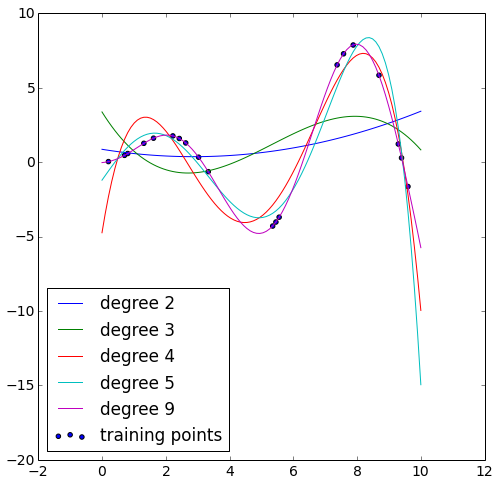

In [9]:
for degree in [2, 3, 4, 5, 9]:
    poly = PolynomialFeatures(degree)
    Xpoly = poly.fit_transform(X)
    model.fit(Xpoly, y)
    print "model parameters for degree " + str(degree) + ": " + str(model.coef_)
    pred = 0
    for i in range(0,degree+1):
        pred += model.coef_[i]*((x_plot)**i)
    plt.plot(x_plot,pred,label="degree %d" % degree)

plt.scatter(X, y, label="training points")
plt.legend(loc='lower left')
plt.show()

The plot shows how a polynomial of degree 9 is required to fit the data set perfectly.

Besides the linear and polynomial models we can use regression to fit many more types of relationships. Let's look at a typical relationship between the dose of a drug and the response to the drug (dose-response-relationship). 

![dose response](dose_response.jpg)

This plot shows a typical sigmoidal nature of such a dose–response curve. The curve plots the percentage of flies that are anesthetized at 75 s (mean ± SEM; triangles) plotted versus the dose of isoflurane anesthesia given (Gadagkara & Callb). 

These types of relationships are typically modeled with a sigmoid function (a.k.a. a logistic function)

$$f(x)=\frac{1}{1+e^{-(\theta_0+\theta_1x)}}$$

where $f(x)$ is the expected response at dosage $x$, $\theta_1$ is the slope at the steepest part of the curve and $\theta_0$ is the dosage at which 50% of the subjects are expected to show the desired response.

Just as with the linear function $f(x)=\theta_0+\theta_1x$ we need to find the values for $\theta_1$ and $\theta_0$ that minimize  the sum of squares of the given data. 

Here we can see what happens if we change parameter $\theta_0$ for the logistic fit:

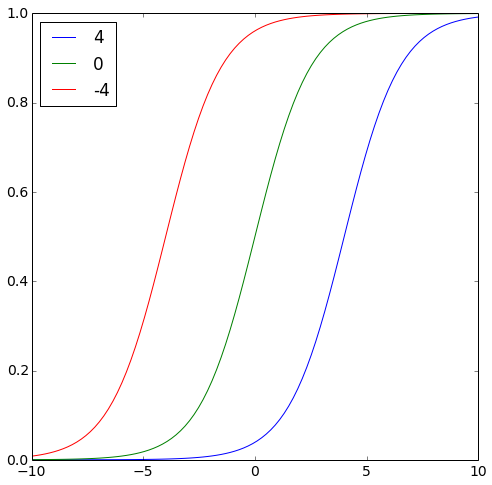

In [6]:
def logistic(theta0,theta1,x):
    return 1/(1+(exp(-1*theta1*(x-theta0))))

x = np.linspace(-10,10,100)
theta1 = 0.8

theta0 = 4
plt.plot(x,logistic(theta0,theta1,x),label=theta0)
theta0 = 0
plt.plot(x,logistic(theta0,theta1,x),label=theta0)
theta0 = -4
plt.plot(x,logistic(theta0,theta1,x),label=theta0)

plt.legend(loc='upper left')
plt.show()

Here we can see what happens if we change parameter $\theta_1$ for the logistic fit:

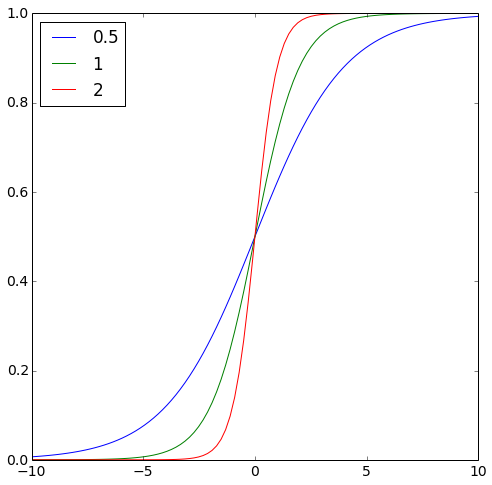

In [7]:
x = np.linspace(-10,10,100)
theta0 = 0

theta1 = 0.5
plt.plot(x,logistic(theta0,theta1,x),label=theta1)
theta1 = 1
plt.plot(x,logistic(theta0,theta1,x),label=theta1)
theta1 = 2
plt.plot(x,logistic(theta0,theta1,x),label=theta1)

plt.legend(loc='upper left')
plt.show()